# Scraping Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
import pandas as pd

# Unduh konten halaman web berita
url = "https://radarjatim.id/lakukan-penipuan-lewat-online-shop-warga-sukomanunggal-dituntut-3-tahun-penjara/"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="content-inner")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")



SIDOARJO (RadarJatim.id) – Jaksa Penuntut Umum (JPU) Kejaksaan Negeri (Kejari) Sidoarjo menuntut terdakwa Ika Rina Winarsih (45 tahun) selama 3 tahun penjara atas kasus penipuan dengan modus bisa memenangkan lelang rumah.
Tuntutan kepada ibu muda yang tinggal di Simo Prona Jaya 2, Kelurahan Simomulyo Baru, Kecamatan Sukomanunggal-Surabaya itu dibacakan oleh Budhi Cahyono, JPU Kejari Sidoarjo saat sidang di Pengadilan Negeri (PN) Sidoarjo, Rabu (18/10/2023).
“Menuntut dengan pidana penjara selama 3 tahun,” kata Budhi Cahyono.
Budi mengungkapkan bahwa terdakwa terbukti melakukan penipuan sebagaimana diatur dalam pasal 378 KUH Pidana yang menyebabkan korbannya Siti Aisyah mengalami kerugian hingga Rp 750 juta.
Modus penipuan yang dilakukan oleh terdakwa dengan memasang iklan penjualan rumah berlokasi di Perumahan Pondok Mutiara Blok G nomor 17 Sidoarjo dengan harga Rp 835 juta di aplikasi online shop.
Pada tanggal 05 Juni 2023 lalu, korban Siti Aisyah tertarik untuk membelinya ketika mel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Inisialisasi DataFrame
df = pd.DataFrame(columns=["Kalimat"])
df["Kalimat"] = sentences
df

,Kalimat
0,\nSIDOARJO (RadarJatim.id) – Jaksa Penuntut Um...
1,Tuntutan kepada ibu muda yang tinggal di Simo ...
2,“Menuntut dengan pidana penjara selama 3 tahun...
3,Budi mengungkapkan bahwa terdakwa terbukti mel...
4,Modus penipuan yang dilakukan oleh terdakwa de...
5,"Pada tanggal 05 Juni 2023 lalu, korban Siti Ai..."
6,Ternyata nomor dalam iklan itu terhubung denga...
7,Foto Ika Rina Winarsih sebelum ditetapkan seba...
8,Kemudian korban mendatangi PT Wincom Indonesia...
9,Lantas korban diarahkan saksi untuk menghubung...


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
SIDOARJO (RadarJatim.id) – Jaksa Penuntut Umum (JPU) Kejaksaan Negeri (Kejari) Sidoarjo menuntut terdakwa Ika Rina Winarsih (45 tahun) selama 3 tahun penjara atas kasus penipuan dengan modus bisa memenangkan lelang rumah.
45: 0.1987
atas: 0.1987
bisa: 0.1987
dengan: 0.1153
id: 0.1987
ika: 0.1743
jaksa: 0.1987
jpu: 0.1743
kasus: 0.1987
kejaksaan: 0.1987
kejari: 0.1570
lelang: 0.1326
memenangkan: 0.1987
menuntut: 0.1743
modus: 0.1743
negeri: 0.1743
penipuan: 0.1570
penjara: 0.1743
penuntut: 0.1987
radarjatim: 0.1987
rina: 0.1743
rumah: 0.1436
selama: 0.1743
sidoarjo: 0.2466
tahun: 0.3486
terdakwa: 0.0961
umum: 0.1987
winarsih: 0.1743

Kalimat 2: Tuntutan kepada ibu muda yang tinggal di Simo Prona Jaya 2, Kelurahan Simomulyo Baru, Kecamatan Sukomanunggal-Surabaya itu dibacakan oleh Budhi Cahyono, JPU Kejari Sidoarjo saat sidang di Pengadilan Negeri (PN) Sidoarjo, Rabu (18/10/2023).
10: 0.1806
18: 0.1806
2023: 0.1305
baru: 0.1806
budhi: 0.1585
cahyono: 0.1585
di: 0.2610
dibacak

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")



Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1330


# Cosine Similarity

In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1330
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.3206
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0376
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.1498
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0459
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.2529
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0193
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0181
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0799
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0898
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0348
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0382
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0550
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.0132
Cosine Similarity antara Kalimat 1 dan Kalimat 17: 0.0400
Cosine Similarity antara Kalimat 1 dan Kalimat 18: 0.0536
Cosine Similarity anta

In [ ]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16,Kalimat 17,Kalimat 18,Kalimat 19
Kalimat 1,1.000000,0.132951,0.320627,0.037552,0.149828,0.000000,0.045853,0.252908,0.019306,0.018054,0.079894,0.089845,0.034798,0.038216,0.054953,0.013161,0.039972,0.053624,0.0
Kalimat 2,0.132951,1.000000,0.107221,0.013391,0.140911,0.034724,0.133487,0.119015,0.027219,0.000000,0.022378,0.000000,0.000000,0.040731,0.000000,0.043900,0.000000,0.193066,0.0
Kalimat 3,0.320627,0.107221,1.000000,0.065347,0.054490,0.000000,0.027065,0.000000,0.037474,0.000000,0.047776,0.000000,0.000000,0.000000,0.000000,0.000000,0.045768,0.000000,0.0
Kalimat 4,0.037552,0.013391,0.065347,1.000000,0.103456,0.092451,0.050771,0.000000,0.000000,0.020007,0.046241,0.014152,0.107922,0.000000,0.000000,0.083515,0.018167,0.166668,0.0
Kalimat 5,0.149828,0.140911,0.054490,0.103456,1.000000,0.095376,0.172959,0.065438,0.040778,0.055342,0.170747,0.043566,0.102845,0.069737,0.000000,0.064894,0.067116,0.152646,0.0
Kalimat 6,0.000000,0.034724,0.000000,0.092451,0.095376,1.000000,0.115526,0.000000,0.221417,0.154481,0.188895,0.129195,0.095256,0.171178,0.018269,0.021327,0.055878,0.015807,0.0
Kalimat 7,0.045853,0.133487,0.027065,0.050771,0.172959,0.115526,1.000000,0.027600,0.373132,0.122586,0.119959,0.035731,0.000000,0.000000,0.000000,0.019860,0.024737,0.085775,0.0
Kalimat 8,0.252908,0.119015,0.000000,0.000000,0.065438,0.000000,0.027600,1.000000,0.000000,0.000000,0.000000,0.000000,0.082279,0.000000,0.066631,0.050783,0.000000,0.035575,0.0
Kalimat 9,0.019306,0.027219,0.037474,0.000000,0.040778,0.221417,0.373132,0.000000,1.000000,0.099388,0.063664,0.070301,0.098174,0.142891,0.023555,0.000000,0.060989,0.020381,0.0
Kalimat 10,0.018054,0.000000,0.000000,0.020007,0.055342,0.154481,0.122586,0.000000,0.099388,1.000000,0.223755,0.100433,0.107109,0.000000,0.031682,0.025714,0.128931,0.051825,0.0


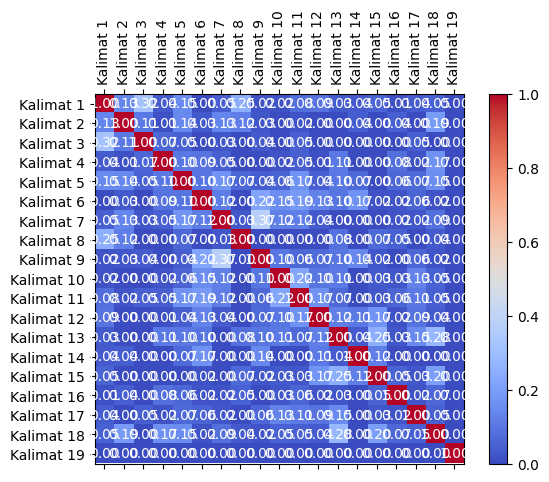

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [ ]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 
SIDOARJO (RadarJatim.id) – Jaksa Penuntut Umum (JPU) Kejaksaan Negeri (Kejari) Sidoarjo menuntut terdakwa Ika Rina Winarsih (45 tahun) selama 3 tahun penjara atas kasus penipuan dengan modus bisa memenangkan lelang rumah.: 23.8951
Closeness Centrality of Tuntutan kepada ibu muda yang tinggal di Simo Prona Jaya 2, Kelurahan Simomulyo Baru, Kecamatan Sukomanunggal-Surabaya itu dibacakan oleh Budhi Cahyono, JPU Kejari Sidoarjo saat sidang di Pengadilan Negeri (PN) Sidoarjo, Rabu (18/10/2023).: 21.0923
Closeness Centrality of “Menuntut dengan pidana penjara selama 3 tahun,” kata Budhi Cahyono.: 16.2265
Closeness Centrality of Budi mengungkapkan bahwa terdakwa terbukti melakukan penipuan sebagaimana diatur dalam pasal 378 KUH Pidana yang menyebabkan korbannya Siti Aisyah mengalami kerugian hingga Rp 750 juta.: 22.7810
Closeness Centrality of Modus penipuan yang dilakukan oleh terdakwa dengan memasang iklan penjualan rumah berlokasi di Perumahan Pondok Mutiara Blok G

# Graph

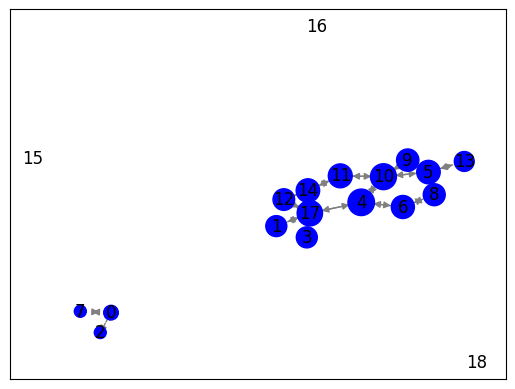

In [ ]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.15 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()


# Closeness Cetrality

In [ ]:
# Cetak closeness centrality
print("Closeness Centrality:")
# for node, closeness in closeness_centrality.items():
#     print(f"Node {node}: {closeness:.4f}")
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
for node, closeness in sorted_closeness.items():
    print(f"Node {node}: {closeness:.4f}")




Closeness Centrality:
Node 4: 0.3636
Node 10: 0.3478
Node 17: 0.3333
Node 11: 0.2963
Node 5: 0.2857
Node 14: 0.2857
Node 6: 0.2759
Node 9: 0.2581
Node 8: 0.2500
Node 12: 0.2424
Node 1: 0.2286
Node 3: 0.2286
Node 13: 0.2051
Node 0: 0.1111
Node 2: 0.0741
Node 7: 0.0741
Node 15: 0.0000
Node 16: 0.0000
Node 18: 0.0000


In [ ]:
# Cetak closeness centrality
top_3_closeness = list(sorted_closeness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datacl = {
    "Node": [node for node, _ in top_3_closeness],
    "Closeness Centrality": [closeness for _, closeness in top_3_closeness],
    "Kalimat": [sentences[node] for node, _ in top_3_closeness]
}

df_top_3 = pd.DataFrame(datacl)

# Cetak DataFrame
print("Tiga Node Closeness Teratas")
df_top_3


Tiga Node Closeness Teratas


,Node,Closeness Centrality,Kalimat
0,4,0.363636,Modus penipuan yang dilakukan oleh terdakwa de...
1,10,0.347826,Korban yang sudah terlanjur kepincut dengan ru...
2,17,0.333333,"Namun, uang sebesar Rp 750 juta itu tak pernah..."


# Page Rank

In [ ]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Cetak PageRank dalam urutan dari terbesar ke terkecil
print("PageRank :")
sorted_pagerank = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
for node, rank in sorted_pagerank.items():
    print(f"Node {node}: {rank:.4f}")


PageRank :
Node 17: 0.1214
Node 5: 0.0962
Node 10: 0.0911
Node 0: 0.0887
Node 14: 0.0718
Node 4: 0.0708
Node 8: 0.0512
Node 6: 0.0509
Node 12: 0.0501
Node 9: 0.0489
Node 11: 0.0488
Node 2: 0.0468
Node 7: 0.0468
Node 1: 0.0298
Node 3: 0.0298
Node 13: 0.0296
Node 15: 0.0091
Node 16: 0.0091
Node 18: 0.0091


In [ ]:

# Cetak closeness centrality
top_3_pagerank = list(sorted_pagerank.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datapg = {
    "Node": [node for node, _ in top_3_pagerank],
    "Pagerank": [rank for _, rank in top_3_pagerank],
    "Kalimat": [sentences[node] for node, _ in top_3_pagerank]
}

df_top_3pg = pd.DataFrame(datapg)

# Cetak DataFrame
print("Tiga Node Pagerank Teratas")
df_top_3pg


Tiga Node Pagerank Teratas


,Node,Pagerank,Kalimat
0,17,0.121384,"Namun, uang sebesar Rp 750 juta itu tak pernah..."
1,5,0.096154,"Pada tanggal 05 Juni 2023 lalu, korban Siti Ai..."
2,10,0.091145,Korban yang sudah terlanjur kepincut dengan ru...


# Between Centrality


In [ ]:
import pandas as pd

# Hitung betweenness centrality
betweenness= nx.betweenness_centrality(G)

# Cetak DataFrame
print("DataFrame Betweenness Centrality:")
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
for node, between in sorted_betweenness.items():
    print(f"Node {node}: {between:.4f}")


DataFrame Betweenness Centrality:
Node 17: 0.1863
Node 4: 0.1699
Node 10: 0.1634
Node 5: 0.0980
Node 11: 0.0425
Node 14: 0.0392
Node 6: 0.0359
Node 8: 0.0163
Node 0: 0.0065
Node 1: 0.0000
Node 2: 0.0000
Node 3: 0.0000
Node 7: 0.0000
Node 9: 0.0000
Node 12: 0.0000
Node 13: 0.0000
Node 15: 0.0000
Node 16: 0.0000
Node 18: 0.0000


In [ ]:
# Cetak closeness centrality
top_3_between = list(sorted_betweenness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
databw = {
    "Node": [node for node, _ in top_3_between],
    "Between": [between for _, between in top_3_between],
    "Kalimat": [sentences[node] for node, _ in top_3_between]
}

df_top_3bw = pd.DataFrame(databw)

# Cetak DataFrame
print("Tiga Node Between Teratas")
df_top_3bw


Tiga Node Between Teratas


,Node,Between,Kalimat
0,17,0.186275,"Namun, uang sebesar Rp 750 juta itu tak pernah..."
1,4,0.169935,Modus penipuan yang dilakukan oleh terdakwa de...
2,10,0.163399,Korban yang sudah terlanjur kepincut dengan ru...
